### Dados referente a um teste de analista de inteligência de mercado. 

Há cerca de uns 2 meses atrás, um amigo meu, na qual trabalhamos juntos em uma empresa aqui em Guarapuava, me pediu para que eu pudesse lhe ajudar nesse teste para uma vaga de inteligência de mercado em uma Start Up na cidade de São Paulo. 

Como tenho mais experiência em modelagem de dados, resolvi ajudar. O teste em questão teria que ser feito e enviado as <b> RESPOSTAS </b> tudo em excel. Como ele acabou me enviando a base de dados do teste, resolvi fazer a minha análise. Podem ficar tranquilos, que eu não tentei a mesma vaga. Afinal, o teste era em excel, e não em Python. 
    
Abaixo questões do teste que a empresa queria que fosse respondido. Exceto a questão Q1 que são preenchimentos especificos no excel, as demais serão analisados, tratados, modelados por aqui. 

<b>Q1</b>. Preencha a área em amarelo da aba "Summary" com os dados da "DataBase". Que conclusões é possível tirar do gráfico gerado?

<b>Q2</b>. Considerando que o custo de aquisição de cada potencial cliente da "DataBase" foi de R$ 10,00 e esse custo não pode ultrapassar 40% da receita, mostre se a operação de Auto Equity é viável ou não, baseado exclusivamente nesse custo. (dado: para o cálculo de receita use a aba anexo1)

<b>Q3</b>. A renda ("monthly_income") é importante para se determinar se um cliente fecha a operação ou não? Como se relacionam as variáveis "renda" vs "probabilidade de fechamento"?

<b>Q4</b>. Com base em análise dos dados fornecidos, determine quais são as 3 variáveis mais relevantes para um cliente fechar a operação. Explique o porquê de ter escolhido essas 3 variáveis dentre as opções.

<b>Q5</b>. Existem diversos perfis de cliente na base. Certos perfis são mais propensos a fechar negócio do que outros. Usando as três variáveis da questão 4, calcule a probabilidade que os diferentes clientes têm de fechar as respectivas operações. Por fim, calcule o valor que cada cliente tem para nós, baseado nesta probabilidade.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt
import plotly
import plotly.offline as py
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)
from yellowbrick.features import FeatureImportances
from pycaret.classification import *

In [2]:
#biblioteca para lidar com classes desbalanceadas. 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [3]:
df1 = pd.read_excel('database.xlsx', sheet_name="DataBase")
df1

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status
0,126413,Auto Equity,2013-09-28,male,1971-11-13,85,4000.0,CE,NaN,0,wokvagem,1995.0,7000.0,0.0,NaN,0.0,NaN
1,125610,Auto Equity,2013-07-22,NaN,1991-05-17,31,900.0,MG,NaN,0,fiat,1999.0,NaN,NaN,NaN,1.0,NaN
2,126523,Auto Equity,2013-10-03,female,1984-01-14,22,1000.0,RJ,NaN,0,honda,2011.0,NaN,0.0,NaN,0.0,NaN
3,125820,Auto Equity,2013-08-12,female,1995-07-07,81,700.0,PE,NaN,0,fiat,2013.0,NaN,0.0,NaN,1.0,NaN
4,125863,Auto Equity,2013-08-16,male,1991-12-23,11,2500.0,SP,NaN,0,volkswagen,2008.0,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57177,637329,Auto Equity,2015-02-11,NaN,1989-05-27,31,NaN,SP,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57178,637370,Auto Equity,2015-02-11,NaN,1952-05-26,41,NaN,PE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57179,637375,Auto Equity,2015-02-11,NaN,1983-11-22,41,NaN,SP,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57180,1025857,Auto Equity,2016-03-03,male,1954-11-20,11,1300.0,SP,NaN,1,Ford,2010.0,NaN,NaN,10000.0,NaN,NaN


In [4]:
df2 = pd.read_excel('database.xlsx', sheet_name="anexo1")
df2 = df2[:27]
del df2['Unnamed: 0']
df2

,state,% receita
0,SP,0.060
1,MG,0.055
2,RJ,0.055
3,SC,0.055
4,MA,0.050
5,ES,0.040
6,PA,0.050
7,PR,0.055
8,GO,0.050
9,AM,0.050


In [5]:
df1.isnull().sum()

id                              0
specific_type                   0
created_at                      0
gender                      14074
birth_date                   4200
phone_code                      0
monthly_income                683
state                           0
cpf_restriction              9654
registration_form_closed        0
brand                         241
model_year                    776
auto_value                   4848
auto_debt                   17333
loan_amount                   174
declares_income_tax         49278
operation_status             2735
dtype: int64

* A coluna state (df1) está relacionado com o df2. 

* Os dados referente a phone_code e state, foram tratados no próprio excel. 

* Próximo passo é juntar os df1 e df2 numa mesma planilha. 



In [6]:
df = pd.merge(df1,df2,how='inner',on='state')
df

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita
0,126413,Auto Equity,2013-09-28,male,1971-11-13,85,4000.0,CE,NaN,0,wokvagem,1995.0,7000.0,0.0,NaN,0.0,NaN,0.04
1,124423,Auto Equity,2013-03-22,NaN,1976-06-10,85,2700.0,CE,NaN,0,fiat,2008.0,26000.0,0.0,1000.00,1.0,NaN,0.04
2,124135,Auto Equity,2013-01-01,NaN,1979-06-30,85,1200.0,CE,NaN,0,FORD,1991.0,6000.0,0.0,1000.00,1.0,NaN,0.04
3,126420,Auto Equity,2013-09-28,male,1979-03-29,85,909.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.00,0.0,NaN,0.04
4,126446,Auto Equity,2013-09-30,male,1979-03-29,85,978.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.00,0.0,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57177,129264,Auto Equity,2013-03-22,NaN,NaT,95,3700.0,RR,NaN,0,FIAT,2012.0,NaN,0.0,28000.00,0.0,no_closed,0.04
57178,951923,Auto Equity,2015-12-28,female,1985-10-17,95,5000.0,RR,1.0,0,VW - VolksWagen,2014.0,43000.0,0.0,34194.53,NaN,no_closed,0.04
57179,832755,Auto Equity,2015-07-23,male,1971-06-29,95,18000.0,RR,0.0,0,VW - VolksWagen,2010.0,51000.0,NaN,45900.00,NaN,no_closed,0.04
57180,1021801,Auto Equity,2016-03-01,male,1990-05-13,95,1390.0,RR,0.0,0,Fiat,2007.0,10000.0,1200.0,5000.00,NaN,NaN,0.04


* Após tratarmos os dados ausentes das colunas States e Phone_code no excell, juntamos esses dados com os valores percentuais cobrados por estado para efetuarmos o cálculo de receita. 

* Aqui temos várias variáveis que precisam ser de certa forma tratadas. E isso pode prejudicar a nossa análise, pois teremos que imputar valores conforme nossa média, mediana ou moda, que podem não ser verdadeiros. 

* Outro ponto importante, é que algumas dessas variáveis não nos trazem nenhuma informação relevante, ou seja, pode ser excluídas. 

* Id é uma informação que não traz nada de importante ou relevante. 


* Os casos de CPF que estão vazios, vamos imputar um valor de 0, dando a entender que esses casos não estão sob restrição. 

* Brand é a marca do carro. Pode ser usado em conjunto com outras variáveis para tentar descobrir qual é a marca do carro, utilizando o ano e o valor como parâmetro. 

* model_year: é o ano do carro. Nessa variável, pode ser imputado o valor da média, que nesse caso é bem próxima a mediana. Ou até mesmo o valor da moda (que é o termo que mais se repete). 

* Auto_value: é o valor do automóvel. Nesse caso há muita diferença dos valores de média e mediana. Teriamos que verificar os valores da moda, para tentarmos tratar essa dispersão e reduzir o valor do Desvio Padrão. 

* Auto_debt: Valor da dívida do automóvel. 

* Loan_amount: é o valor desejado para que seja emprestado. 

* Declares_income_tax: declaração do imposto de renda. 

* Operation_status: se a operação está aprovada, negada ou cliente em análise. 


In [7]:
df.describe()

,id,phone_code,monthly_income,cpf_restriction,registration_form_closed,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,% receita
count,5.718200e+04,57182.000000,56499.000000,47528.000000,57182.00000,56406.000000,52334.000000,39849.000000,57008.000000,7904.000000,57182.000000
mean,7.221712e+05,35.102690,4003.237027,0.445653,0.06899,2008.182534,23207.411111,3917.837769,14729.417625,0.584135,0.055095
std,2.948116e+05,25.793285,3445.898490,0.497043,0.25344,169.529922,18437.194065,8539.138966,13755.751334,0.492902,0.006047
min,1.061330e+05,11.000000,200.000000,0.000000,0.00000,1112.000000,4000.000000,0.000000,1000.000000,0.000000,0.040000
25%,5.833180e+05,11.000000,2000.000000,0.000000,0.00000,2003.000000,12000.000000,0.000000,6717.047500,0.000000,0.055000
50%,8.144845e+05,22.000000,3000.000000,0.000000,0.00000,2008.000000,19000.000000,0.000000,11000.000000,1.000000,0.055000
75%,9.602920e+05,51.000000,5000.000000,1.000000,0.00000,2011.000000,28000.000000,4000.000000,18000.000000,1.000000,0.060000
max,1.067133e+06,99.000000,30000.000000,1.000000,1.00000,20055.000000,400000.000000,380000.000000,500000.000000,1.000000,0.060000


In [8]:
del df['id']
del df['specific_type']

Nós não vamos tratar a variável gênero, pois essa variável não entrará no modelo final. Se colocarmos a variável gênero para o algoritmo de classificação, ele vai incluir essa variável no seu processo de aprendizado, o que poderá no futuro, gerar discriminação por parte do algoritmo em relação a um dos gêneros. 

Queremos evitar, que individuos, com rendas parecidas, situação cadastral parecida, tenham classificações diferentes. 



In [9]:
df.isnull().sum()

created_at                      0
gender                      14074
birth_date                   4200
phone_code                      0
monthly_income                683
state                           0
cpf_restriction              9654
registration_form_closed        0
brand                         241
model_year                    776
auto_value                   4848
auto_debt                   17333
loan_amount                   174
declares_income_tax         49278
operation_status             2735
% receita                       0
dtype: int64

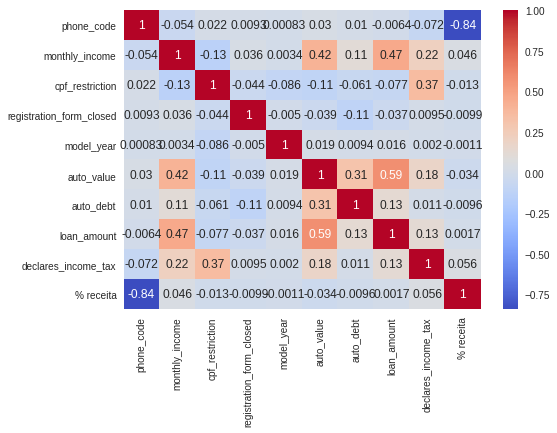

In [10]:
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)


O primeiro passo para começar a entendermos quais variáveis estão correlacionadas entre sim, é plotando um gráfico de correlação. 

 - Correlação baixa: 0 a 30
 - Correlação media: 31 a 70
 - Correlação forte: acima de 70
 
 Nesse caso o salario mensal (monthly_income) está relacionado com uma correlação media positiva com o valor do automóvel e com o valor desejado para empréstimo. O salário mensal ainda possuí uma correlação baixa positiva em relação a imposto de renda. Isso significa que boa parte dessa base, as pessoas não declaram imposto de renda. 
 

In [11]:
import datetime

In [12]:
hoje=datetime.date.today()


In [13]:
df['hoje'] = hoje
df.head()

,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,hoje
0,2013-09-28,male,1971-11-13,85,4000.0,CE,NaN,0,wokvagem,1995.0,7000.0,0.0,NaN,0.0,NaN,0.04,2021-01-13
1,2013-03-22,NaN,1976-06-10,85,2700.0,CE,NaN,0,fiat,2008.0,26000.0,0.0,1000.0,1.0,NaN,0.04,2021-01-13
2,2013-01-01,NaN,1979-06-30,85,1200.0,CE,NaN,0,FORD,1991.0,6000.0,0.0,1000.0,1.0,NaN,0.04,2021-01-13
3,2013-09-28,male,1979-03-29,85,909.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.0,0.0,NaN,0.04,2021-01-13
4,2013-09-30,male,1979-03-29,85,978.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.0,0.0,NaN,0.04,2021-01-13


In [14]:
df['hoje'] = pd.to_datetime(df['hoje'], format='%Y-%m-%d')
df.head()

,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,hoje
0,2013-09-28,male,1971-11-13,85,4000.0,CE,NaN,0,wokvagem,1995.0,7000.0,0.0,NaN,0.0,NaN,0.04,2021-01-13
1,2013-03-22,NaN,1976-06-10,85,2700.0,CE,NaN,0,fiat,2008.0,26000.0,0.0,1000.0,1.0,NaN,0.04,2021-01-13
2,2013-01-01,NaN,1979-06-30,85,1200.0,CE,NaN,0,FORD,1991.0,6000.0,0.0,1000.0,1.0,NaN,0.04,2021-01-13
3,2013-09-28,male,1979-03-29,85,909.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.0,0.0,NaN,0.04,2021-01-13
4,2013-09-30,male,1979-03-29,85,978.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.0,0.0,NaN,0.04,2021-01-13


In [15]:
df['dias'] = df['hoje'] - df['birth_date']
df.head()

,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,hoje,dias
0,2013-09-28,male,1971-11-13,85,4000.0,CE,NaN,0,wokvagem,1995.0,7000.0,0.0,NaN,0.0,NaN,0.04,2021-01-13,17959 days
1,2013-03-22,NaN,1976-06-10,85,2700.0,CE,NaN,0,fiat,2008.0,26000.0,0.0,1000.0,1.0,NaN,0.04,2021-01-13,16288 days
2,2013-01-01,NaN,1979-06-30,85,1200.0,CE,NaN,0,FORD,1991.0,6000.0,0.0,1000.0,1.0,NaN,0.04,2021-01-13,15173 days
3,2013-09-28,male,1979-03-29,85,909.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.0,0.0,NaN,0.04,2021-01-13,15266 days
4,2013-09-30,male,1979-03-29,85,978.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.0,0.0,NaN,0.04,2021-01-13,15266 days


In [16]:
type(df['dias'].iloc[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [17]:
df['idade'] = df['dias'] / 365.25
df

,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,hoje,dias,idade
0,2013-09-28,male,1971-11-13,85,4000.0,CE,NaN,0,wokvagem,1995.0,7000.0,0.0,NaN,0.0,NaN,0.04,2021-01-13,17959 days,49 days 04:03:26.981519
1,2013-03-22,NaN,1976-06-10,85,2700.0,CE,NaN,0,fiat,2008.0,26000.0,0.0,1000.00,1.0,NaN,0.04,2021-01-13,16288 days,44 days 14:15:31.416837
2,2013-01-01,NaN,1979-06-30,85,1200.0,CE,NaN,0,FORD,1991.0,6000.0,0.0,1000.00,1.0,NaN,0.04,2021-01-13,15173 days,41 days 12:59:37.823408
3,2013-09-28,male,1979-03-29,85,909.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.00,0.0,NaN,0.04,2021-01-13,15266 days,41 days 19:06:17.002053
4,2013-09-30,male,1979-03-29,85,978.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.00,0.0,NaN,0.04,2021-01-13,15266 days,41 days 19:06:17.002053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57177,2013-03-22,NaN,NaT,95,3700.0,RR,NaN,0,FIAT,2012.0,NaN,0.0,28000.00,0.0,no_closed,0.04,2021-01-13,NaT,NaT
57178,2015-12-28,female,1985-10-17,95,5000.0,RR,1.0,0,VW - VolksWagen,2014.0,43000.0,0.0,34194.53,NaN,no_closed,0.04,2021-01-13,12872 days,35 days 05:47:55.564681
57179,2015-07-23,male,1971-06-29,95,18000.0,RR,0.0,0,VW - VolksWagen,2010.0,51000.0,NaN,45900.00,NaN,no_closed,0.04,2021-01-13,18096 days,49 days 13:03:34.373716
57180,2016-03-01,male,1990-05-13,95,1390.0,RR,0.0,0,Fiat,2007.0,10000.0,1200.0,5000.00,NaN,NaN,0.04,2021-01-13,11203 days,30 days 16:07:53.100616


In [18]:
df['idade'] = pd.to_numeric(df['idade'].dt.days, downcast='integer')
df.head()

,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,hoje,dias,idade
0,2013-09-28,male,1971-11-13,85,4000.0,CE,NaN,0,wokvagem,1995.0,7000.0,0.0,NaN,0.0,NaN,0.04,2021-01-13,17959 days,49.0
1,2013-03-22,NaN,1976-06-10,85,2700.0,CE,NaN,0,fiat,2008.0,26000.0,0.0,1000.0,1.0,NaN,0.04,2021-01-13,16288 days,44.0
2,2013-01-01,NaN,1979-06-30,85,1200.0,CE,NaN,0,FORD,1991.0,6000.0,0.0,1000.0,1.0,NaN,0.04,2021-01-13,15173 days,41.0
3,2013-09-28,male,1979-03-29,85,909.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.0,0.0,NaN,0.04,2021-01-13,15266 days,41.0
4,2013-09-30,male,1979-03-29,85,978.0,CE,NaN,0,dafra,2009.0,NaN,0.0,1000.0,0.0,NaN,0.04,2021-01-13,15266 days,41.0


Após encontrar a idade podemos excluir as variáveis referente a nascimento, dia atual e dias vividos. 


Outro ponto importante, tendo o valor da idade como valor, podemos tratar os valores ausentes dessa variável de forma muito mais rápida e simples. 


In [19]:
del df['birth_date']
del df['hoje']
del df['dias']



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57182 entries, 0 to 57181
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   created_at                57182 non-null  datetime64[ns]
 1   gender                    43108 non-null  object        
 2   phone_code                57182 non-null  int64         
 3   monthly_income            56499 non-null  float64       
 4   state                     57182 non-null  object        
 5   cpf_restriction           47528 non-null  float64       
 6   registration_form_closed  57182 non-null  int64         
 7   brand                     56941 non-null  object        
 8   model_year                56406 non-null  float64       
 9   auto_value                52334 non-null  float64       
 10  auto_debt                 39849 non-null  float64       
 11  loan_amount               57008 non-null  float64       
 12  declares_income_ta

In [21]:
df['idade'].mode()

0    38.0
dtype: float64

In [22]:
df['idade'].fillna(int(df['idade'].mode()), inplace=True)

In [23]:
df.describe()

,phone_code,monthly_income,cpf_restriction,registration_form_closed,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,% receita,idade
count,57182.000000,56499.000000,47528.000000,57182.00000,56406.000000,52334.000000,39849.000000,57008.000000,7904.000000,57182.000000,57182.000000
mean,35.102690,4003.237027,0.445653,0.06899,2008.182534,23207.411111,3917.837769,14729.417625,0.584135,0.055095,42.203648
std,25.793285,3445.898490,0.497043,0.25344,169.529922,18437.194065,8539.138966,13755.751334,0.492902,0.006047,11.068586
min,11.000000,200.000000,0.000000,0.00000,1112.000000,4000.000000,0.000000,1000.000000,0.000000,0.040000,20.000000
25%,11.000000,2000.000000,0.000000,0.00000,2003.000000,12000.000000,0.000000,6717.047500,0.000000,0.055000,34.000000
50%,22.000000,3000.000000,0.000000,0.00000,2008.000000,19000.000000,0.000000,11000.000000,1.000000,0.055000,40.000000
75%,51.000000,5000.000000,1.000000,0.00000,2011.000000,28000.000000,4000.000000,18000.000000,1.000000,0.060000,49.000000
max,99.000000,30000.000000,1.000000,1.00000,20055.000000,400000.000000,380000.000000,500000.000000,1.000000,0.060000,98.000000


In [24]:
df.isnull().sum()

created_at                      0
gender                      14074
phone_code                      0
monthly_income                683
state                           0
cpf_restriction              9654
registration_form_closed        0
brand                         241
model_year                    776
auto_value                   4848
auto_debt                   17333
loan_amount                   174
declares_income_tax         49278
operation_status             2735
% receita                       0
idade                           0
dtype: int64

In [25]:
df['monthly_income'].mode()

0    3000.0
dtype: float64

In [26]:
df['monthly_income'].fillna(int(df['monthly_income'].mode()), inplace=True)

In [27]:
df['cpf_restriction'].value_counts()

0.0    26347
1.0    21181
Name: cpf_restriction, dtype: int64

In [28]:
df['cpf_restriction'].fillna(0.0, inplace=True)

In [29]:
df['loan_amount'].fillna(int(df['loan_amount'].mode()), inplace=True)

In [30]:
df['auto_value'].mode()

0    20000.0
dtype: float64

<Figure size 792x504 with 0 Axes>

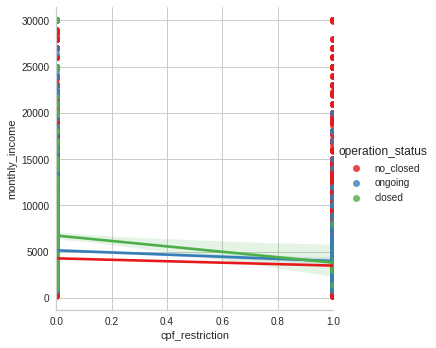

In [31]:
plt.figure(figsize=(11,7))
sns.lmplot(y='monthly_income',x='cpf_restriction',data=df,hue='operation_status',palette='Set1')

Nesse gráfico temos a relação entre Renda mensal e Restrição do CPF. 

* Pessoas sem restrição do CPF = 0
* Pessoas com restrição do CPF = 1

* A grande maioria das pessoas que não possuem restrição no seu CPF tiveram os seus empréstimos liberados. 
* Das pessoas que tiveram os seus empréstimos liberados, a grande maioria tem uma renda de até 15.000,00 reais. 
* Pessoas com renda alta e com restrição, tem probabilidade muito pequena de conseguir empréstimo. 

<Figure size 792x504 with 0 Axes>

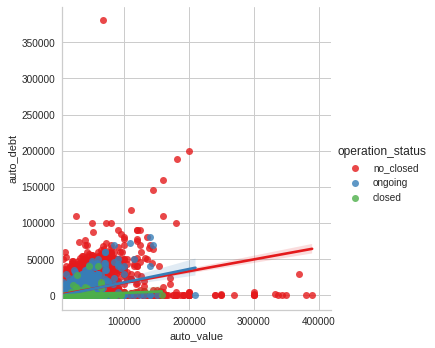

In [32]:
plt.figure(figsize=(11,7))
sns.lmplot(y='auto_debt',x='auto_value',data=df,hue='operation_status',palette='Set1')

Nesse gráfico temos a relação entre valor do automóvel e débitos do automóvel. 

* Na modalidade de empréstimo com garantia do seu automóvel, veículos com débitos tem uma probabilidade muito pequena de terem seus empréstimos liberados. Conforme o gráfico acima, foram poucos as pessoas que conseguiram ter seu empréstimo liberado mesmo seu automóvel tendo débitos. 
* Débitos não ultrapassaram os 5.000,00 reais. 
* Carros com um valor de aproximadamente 15.000,00 e sem débitos tem uma maior probabilidade de ter o seu empréstimo lierado. 
* Carros com um valor superior a 15.000,00 e sem débitos, tiveram poucos empréstimos liberados, o que indica que existem outras variáveis que tem uma influência no modelo. 

<Figure size 792x504 with 0 Axes>

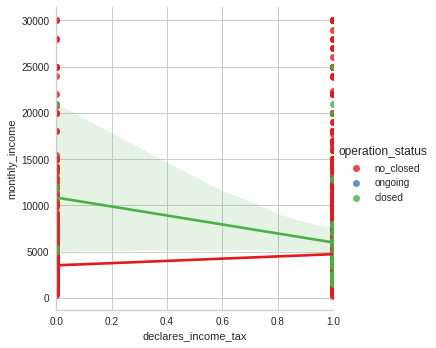

In [33]:
plt.figure(figsize=(11,7))
sns.lmplot(y='monthly_income',x='declares_income_tax',data=df,hue='operation_status',palette='Set1');

Nesse gráfico temos a relação entre Renda Mensal e pessoas que declaram imposto de renda.

* Pessoas que declaram imposto de renda, tem uma maior probabilidade de conseguir que seu empréstimo seja liberado. Visto que declarar imposto de renda, é uma confirmação de que de fato sua renda é maior do que a média da maioria. 


<Figure size 936x648 with 0 Axes>

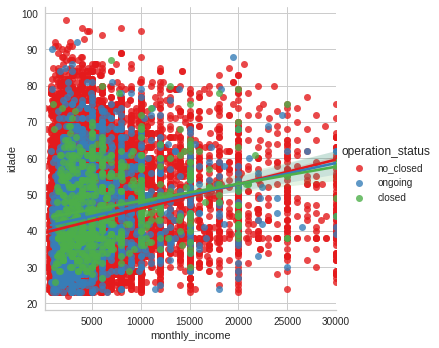

In [34]:
plt.figure(figsize=(13,9))
sns.lmplot(y='idade',x='monthly_income',data=df,hue='operation_status',palette='Set1');

* Nesse gráfico temos uma relação entre idade e renda. Ao contrário do que imaginavamos, renda alta não é garantia ou sucesso para ter o seu empréstimo aprovado. 
* Outro ponto interessante, idades com maiores chances de ter o seu crédito aprovado é dos 30 aos 50 anos. 
* Depois dos 70 anos, as chances de ter o seu empréstimo liberado mediante garantia, é bem pequena.
* Pessoas com renda acima de 25.000,00 reais tiveram pouco créditos aprovados, o que indica que há outros fatores ou variáveis tão ou mais importantes do que a renda por exemplo. 

In [35]:
codigos_genero = {
    "male": "male",
    "MALE": "male", 
    "female": "female"}

colunas_para_codigos = {
    'gender': codigos_genero
}

df.replace(colunas_para_codigos,inplace=True)

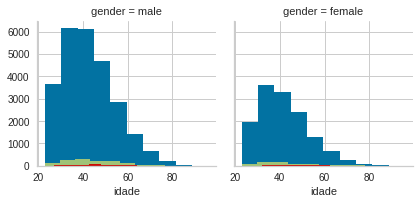

In [36]:
g = sns.FacetGrid(data=df,col='gender', hue='operation_status')
g.map(plt.hist,'idade')

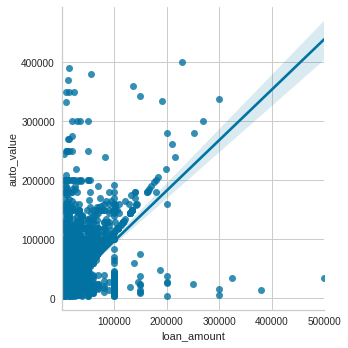

In [37]:
sns.lmplot(x='loan_amount',y='auto_value', data=df,palette='Set1');

Nesse gráfico de Regressão podemos notar uma certa relação entre valor desejado do empréstimo (loan amount) com o valor do automóvel (auto_value). Isso é um indicativo de que os valores dos empréstimos tendem a acompanhar o valor do automóvel. Se o carro vale 10.000,00, existe uma tendencia de que o valor do empréstimo não ultrapasse o valor do automóvel. 

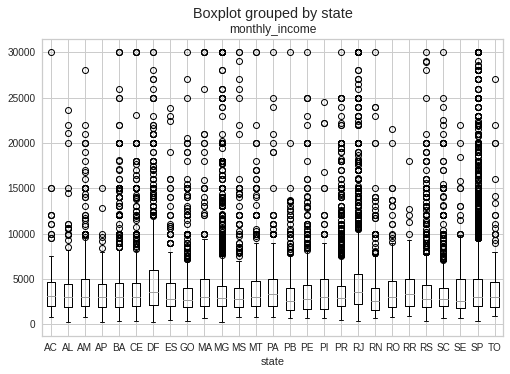

In [38]:
df.boxplot(column='monthly_income', by='state')

Vamos verificar qual é o valor mais baixo de salário das pessoas que tiveram declarado imposto de renda. 

A nossa legislação diz que salário abaixo de R$1.903,98 pessoa física não paga Imposto de renda. Ou seja, pessoas que marcaram na variável <b> declares_income_tax</b> com uma renda abaixo de 1903,98 temos duas hipóteses:

Ou mentiram quanto ao seu salário real;
Ou mentiram quanto a declarar imposto de renda. 

Pode até ser que a pessoa já tenha um dia declarado o imposto de renda, por ter um salário mais alto. Mas de todo o modo, teremos que tratar essa variável. Para isso iremos criar uma função. 

In [39]:
def categoriza(s):
    if s > 1903.98:
       return 1
    elif s <= 1903.98:
       return 0
    

In [40]:
df['declares_income_tax'] = df['monthly_income'].apply(categoriza)

In [41]:
df['declares_income_tax'].value_counts()

1    44784
0    12398
Name: declares_income_tax, dtype: int64

##### RESPOSTA DA QUESTÃO 2

In [42]:
Custo = 57182*10
Custo

571820

In [43]:
df['Receitas'] = df['loan_amount'] * df['% receita']
df

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas
0,2013-09-28,male,85,4000.0,CE,0.0,0,wokvagem,1995.0,7000.0,0.0,5000.00,1,NaN,0.04,49.0,200.0000
1,2013-03-22,NaN,85,2700.0,CE,0.0,0,fiat,2008.0,26000.0,0.0,1000.00,1,NaN,0.04,44.0,40.0000
2,2013-01-01,NaN,85,1200.0,CE,0.0,0,FORD,1991.0,6000.0,0.0,1000.00,0,NaN,0.04,41.0,40.0000
3,2013-09-28,male,85,909.0,CE,0.0,0,dafra,2009.0,NaN,0.0,1000.00,0,NaN,0.04,41.0,40.0000
4,2013-09-30,male,85,978.0,CE,0.0,0,dafra,2009.0,NaN,0.0,1000.00,0,NaN,0.04,41.0,40.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57177,2013-03-22,NaN,95,3700.0,RR,0.0,0,FIAT,2012.0,NaN,0.0,28000.00,1,no_closed,0.04,38.0,1120.0000
57178,2015-12-28,female,95,5000.0,RR,1.0,0,VW - VolksWagen,2014.0,43000.0,0.0,34194.53,1,no_closed,0.04,35.0,1367.7812
57179,2015-07-23,male,95,18000.0,RR,0.0,0,VW - VolksWagen,2010.0,51000.0,NaN,45900.00,1,no_closed,0.04,49.0,1836.0000
57180,2016-03-01,male,95,1390.0,RR,0.0,0,Fiat,2007.0,10000.0,1200.0,5000.00,0,NaN,0.04,30.0,200.0000


In [44]:
Receita = df['Receitas'].sum()
Receita

46317095.3139

In [45]:
receita = Receita * 0.4
receita

18526838.12556

In [46]:
Custo

571820

In [47]:
receita > Custo

True

In [48]:
Lucro = Receita - Custo
Lucro

45745275.3139

##### Com base na estimativa inicial, levando em conta o custo de aquisição de cada cliente, sim, é viável economicamente esse tipo de operação. 

<b> Filtragem e preparação dos dados. </b>

Nesta etapa iremos dividir e preparar os arquivos para criarmos o modelo de machine learning que irá fazer a classificações automaticamente. 

Primeiramente, vamos separar os dados que estão na variável Operation Status (No Closed, Closed e Ongoing).
* No Closed: Cliente negado.
* Closed: Cliente aprovado e com operação fechada
* Ongoing: Cliente em análise. 

Após fazermos a separação dos dados dessa variável, o objetivo é juntarmos os dados no closed e o closed para criarmos e rodarmos o modelo. E os dados ongoing (que são clientes que ainda estão sob análise)será a parte dos dados para fazermos a validação desse modelo.

In [49]:
df.loc[df['operation_status']=='closed']

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas
759,2015-10-02,female,85,2029.0,CE,0.0,1,Ford,2010.0,19000.0,0.0,8000.0,1,closed,0.04,36.0,320.0
791,2014-10-15,male,85,18000.0,CE,0.0,0,Kia Motors,2008.0,33000.0,NaN,9000.0,1,closed,0.04,50.0,360.0
805,2014-05-19,male,85,10000.0,CE,0.0,0,Renault,NaN,20000.0,0.0,10000.0,1,closed,0.04,61.0,400.0
829,2015-10-07,NaN,85,4300.0,CE,0.0,0,Fiat,2012.0,16000.0,NaN,10000.0,1,closed,0.04,33.0,400.0
858,2015-04-22,NaN,85,1600.0,CE,0.0,0,GM - Chevrolet,2012.0,15000.0,NaN,11250.0,0,closed,0.04,29.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56633,2015-06-29,male,67,2000.0,MS,0.0,0,VW - VolksWagen,2008.0,13000.0,0.0,11000.0,1,closed,0.05,35.0,550.0
56634,2016-03-04,male,67,3300.0,MS,0.0,0,Citroën,2010.0,29000.0,NaN,11000.0,1,closed,0.05,41.0,550.0
56767,2015-07-13,male,67,5500.0,MS,0.0,0,GM - Chevrolet,2012.0,55000.0,0.0,35000.0,1,closed,0.05,38.0,1750.0
56773,2015-08-31,male,67,8500.0,MS,0.0,1,GM - Chevrolet,2010.0,41000.0,NaN,36900.0,1,closed,0.05,58.0,1845.0


Primeiramente rodamos um df.loc que significa que queremos localizar uma informação especifica, neste caso apenas os clientes que foram aprovados. 

In [50]:
closed = df.loc[df['operation_status']=='closed']

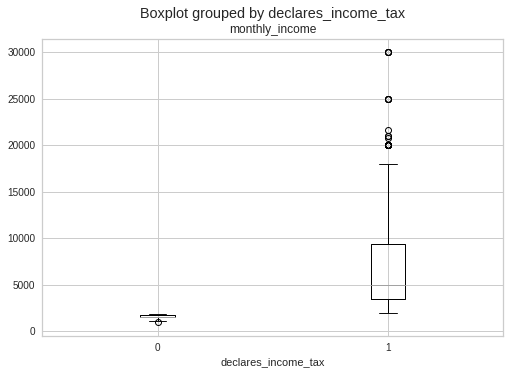

In [51]:
closed.boxplot(column='monthly_income', by='declares_income_tax')

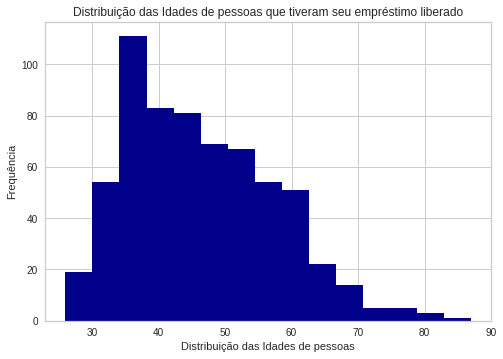

In [52]:
plt.hist((closed['idade']), bins=15, color = 'darkblue')
plt.xlabel('Distribuição das Idades de pessoas')
plt.ylabel('Frequência')
plt.title('Distribuição das Idades de pessoas que tiveram seu empréstimo liberado')
plt.show()

Um dos principais motivos para filtramos apenas os casos de clientes aprovados, é buscar entender quais variáveis foram essencias para essa classificação. 

Com base no histograma, referente as pessoas que tiveram seus empréstimos liberados, podemos constatar que pessoas com idades de 32 até aos 40 anos tem uma grande probabilidade de terem seus pedidos liberados. Mas será que essa diferença na quantidade de pedidos aprovados referente as essas idades, não ter haver com a quantidade de pedidos de empréstimos dessa faixa etária ser muito maior? 

É uma hipótese, e devemos investigar. 



In [53]:
closed['declares_income_tax']
closed.sort_values(by='declares_income_tax', ascending=False).head(25)


,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas
759,2015-10-02,female,85,2029.0,CE,0.0,1,Ford,2010.0,19000.0,0.0,8000.00,1,closed,0.04,36.0,320.0000
35580,2014-11-17,NaN,11,5000.0,SP,0.0,0,Renault,2014.0,30000.0,NaN,27000.00,1,closed,0.06,62.0,1620.0000
35446,2016-02-11,male,11,5600.0,SP,0.0,1,GM - Chevrolet,2011.0,30000.0,0.0,27000.00,1,closed,0.06,42.0,1620.0000
35447,2016-02-12,male,11,12000.0,SP,0.0,1,Nissan,2011.0,30000.0,0.0,27000.00,1,closed,0.06,60.0,1620.0000
35451,2015-05-05,female,11,5000.0,SP,0.0,0,GM - Chevrolet,2012.0,30000.0,0.0,27000.00,1,closed,0.06,30.0,1620.0000
35479,2013-02-26,NaN,11,12800.0,SP,0.0,0,Honda,2011.0,NaN,0.0,27000.00,1,closed,0.06,38.0,1620.0000
35520,2015-06-02,male,19,6000.0,SP,0.0,0,VW - VolksWagen,2014.0,31000.0,NaN,27000.00,1,closed,0.06,41.0,1620.0000
35550,2014-10-08,NaN,11,5000.0,SP,0.0,0,Honda,2010.0,30000.0,NaN,27000.00,1,closed,0.06,44.0,1620.0000
35563,2015-07-29,female,12,6000.0,SP,0.0,0,Fiat,2012.0,30000.0,NaN,27000.00,1,closed,0.06,56.0,1620.0000
35583,2014-07-09,male,11,5200.0,SP,0.0,0,VW - VolksWagen,2014.0,30000.0,NaN,27000.00,1,closed,0.06,52.0,1620.0000


In [54]:
df.isnull().sum()

created_at                      0
gender                      14074
phone_code                      0
monthly_income                  0
state                           0
cpf_restriction                 0
registration_form_closed        0
brand                         241
model_year                    776
auto_value                   4848
auto_debt                   17333
loan_amount                     0
declares_income_tax             0
operation_status             2735
% receita                       0
idade                           0
Receitas                        0
dtype: int64

* Existem 6 variáveis que contém valores nulos dentro de suas variáveis. 

<b>Gender:</b> é a variável gênero. Não iremos trata-la, pois não vamos precisar usar ela na construção do modelo. Isso porque utilizar a variável genêro, orientação sexual, raça e etc, pode enviesar e até mesmo criar uma certo "preconceito" por parte do algoritmo. Por isso essa variável não foi tratata, pois não será utilizada. 

<b>Brand:</b> é a marca do carro. Não iremos tratar essa variável, pois a marca do carro é irrelevante para a criação do modelo. Não importa a marca, e sim o seu valor. 

<b>Auto_value</b>: é o valor do automóvel. Sim essa variável será tratada utilizando a moda como referência. A modo é o termo que mais se repete.

<b>Model_year:</b> ano do modelo do carro. Nesse caso, iremos usar variáveis acima de 2005. Isso porque a empresa aceita carros a partir de um determinado ano. Tentei achar essa informação no site mas não consegui. Por isso defini, usar dados referente ao modelo do carro, acima de 2005.

<b>Auto_debt:</b> são os débitos do carro. Nessa variável foi escolhido imputar o valor de 0 (zero), isso porque, se a variável está faltando, eu entendo que esses carros estão sem débitos. Outro motivo para isso, é que a mediana e a moda dessa variável são igual a 0. O que reforça essa nossa decisão. 

<b> Operation_Status: </b> nessa variável iremos imputar no valores nulos a variável ongoing. Se não temos a confirmação do que se refere essa variável, é preferível deixar como ongoing (sob análise). Fora que fazendo isso, praticamente duplicaremos os dados para validação do modelo.       


In [55]:
df.describe()

,phone_code,monthly_income,cpf_restriction,registration_form_closed,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,% receita,idade,Receitas
count,57182.000000,57182.000000,57182.000000,57182.00000,56406.000000,52334.000000,39849.000000,57182.000000,57182.000000,57182.000000,57182.000000,57182.000000
mean,35.102690,3991.254045,0.370414,0.06899,2008.182534,23207.411111,3917.837769,14699.811829,0.783184,0.055095,42.203648,809.994322
std,25.793285,3426.990354,0.482920,0.25344,169.529922,18437.194065,8539.138966,13745.256555,0.412080,0.006047,11.068586,768.178837
min,11.000000,200.000000,0.000000,0.00000,1112.000000,4000.000000,0.000000,1000.000000,0.000000,0.040000,20.000000,40.000000
25%,11.000000,2000.000000,0.000000,0.00000,2003.000000,12000.000000,0.000000,6500.000000,1.000000,0.055000,34.000000,360.000000
50%,22.000000,3000.000000,0.000000,0.00000,2008.000000,19000.000000,0.000000,11000.000000,1.000000,0.055000,40.000000,600.000000
75%,51.000000,5000.000000,1.000000,0.00000,2011.000000,28000.000000,4000.000000,18000.000000,1.000000,0.060000,49.000000,990.000000
max,99.000000,30000.000000,1.000000,1.00000,20055.000000,400000.000000,380000.000000,500000.000000,1.000000,0.060000,98.000000,27500.000000


In [56]:
df['auto_value'].mode()

0    20000.0
dtype: float64

In [57]:
df['auto_value'].fillna(int(df['auto_debt'].mode()), inplace=True)

In [58]:
df['auto_debt'].fillna(0, inplace=True)

In [59]:
df['operation_status'].fillna('ongoing', inplace=True)

Nesta etapa, iremos dividir a variável <b>operation_status</b> em 3 e juntar as variáveis <b> closed </b> e <b>no_closed</b> para o dataset de treino, e a variável <b>ongoing</b> para o dataset de teste/validação. 

In [60]:
teste = df.loc[df['operation_status']=='ongoing']

In [61]:
treino1 = df.loc[df['operation_status']=='closed'] 
treino1

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas
759,2015-10-02,female,85,2029.0,CE,0.0,1,Ford,2010.0,19000.0,0.0,8000.0,1,closed,0.04,36.0,320.0
791,2014-10-15,male,85,18000.0,CE,0.0,0,Kia Motors,2008.0,33000.0,0.0,9000.0,1,closed,0.04,50.0,360.0
805,2014-05-19,male,85,10000.0,CE,0.0,0,Renault,NaN,20000.0,0.0,10000.0,1,closed,0.04,61.0,400.0
829,2015-10-07,NaN,85,4300.0,CE,0.0,0,Fiat,2012.0,16000.0,0.0,10000.0,1,closed,0.04,33.0,400.0
858,2015-04-22,NaN,85,1600.0,CE,0.0,0,GM - Chevrolet,2012.0,15000.0,0.0,11250.0,0,closed,0.04,29.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56633,2015-06-29,male,67,2000.0,MS,0.0,0,VW - VolksWagen,2008.0,13000.0,0.0,11000.0,1,closed,0.05,35.0,550.0
56634,2016-03-04,male,67,3300.0,MS,0.0,0,Citroën,2010.0,29000.0,0.0,11000.0,1,closed,0.05,41.0,550.0
56767,2015-07-13,male,67,5500.0,MS,0.0,0,GM - Chevrolet,2012.0,55000.0,0.0,35000.0,1,closed,0.05,38.0,1750.0
56773,2015-08-31,male,67,8500.0,MS,0.0,1,GM - Chevrolet,2010.0,41000.0,0.0,36900.0,1,closed,0.05,58.0,1845.0


In [62]:
treino2 = df.loc[df['operation_status']=='no_closed']

Na linha abaixo, estamos filtrando algumas variáveis. Queremos o ano do modelo do carro a partir de 2005, e não queremos nenhuma variável que tenha o valor do automóvel igual a 0. Se o valor é 0, significa que o carro não tem nenhum valor. Se não tem valor, não serve para garantia. 

O Head(650), significa que queremos 650 variáveis. Já que o dataframe referente aos clientes que tiveram seus pedidos de empréstimo negados tem mais de 28657. Se eu colocar, todas as variáveis para treinar o modelo, as classes ficarão desbalanceadas, e isso acarretará em uma aprendizagem de máquina falha. O modelo vai aprender muito bem com as variáveis "no_closed", porém aprenderá muito pouco em relação asvariáveis "closed". Por isso que iremos utilizar o head(650, dessa forma vamos selecionar apenas as 650 variáveis que fazem parte do filtro abaixo. 

In [63]:
treino21 = treino2.loc[(treino2['model_year']>2005.0) & (treino2['auto_value']>0.0)].head(650)
treino21

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas
53,2014-11-07,male,88,5000.0,CE,0.0,0,GM - Chevrolet,2012.0,34000.0,0.0,5000.00,1,no_closed,0.04,24.0,200.0000
55,2015-08-20,male,85,3200.0,CE,1.0,0,VW - VolksWagen,2010.0,30000.0,0.0,5000.00,1,no_closed,0.04,32.0,200.0000
56,2016-02-17,male,85,2000.0,CE,1.0,0,Peugeot,2010.0,20000.0,0.0,5000.00,1,no_closed,0.04,44.0,200.0000
57,2015-08-31,female,85,4392.0,CE,1.0,0,Peugeot,2011.0,20000.0,0.0,5000.00,1,no_closed,0.04,34.0,200.0000
58,2015-09-15,NaN,88,2500.0,CE,1.0,0,Fiat,2006.0,19000.0,0.0,5000.00,1,no_closed,0.04,35.0,200.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,2015-05-18,female,88,4600.0,CE,0.0,0,VW - VolksWagen,2009.0,24000.0,23000.0,21600.00,1,no_closed,0.04,51.0,864.0000
1103,2014-11-25,male,85,1800.0,CE,0.0,0,VW - VolksWagen,2010.0,28000.0,28000.0,21755.98,0,no_closed,0.04,36.0,870.2392
1104,2015-12-10,male,85,3200.0,CE,0.0,1,Mitsubishi,2007.0,45000.0,0.0,21884.50,1,no_closed,0.04,28.0,875.3800
1105,2015-05-15,NaN,85,8000.0,CE,0.0,0,Peugeot,2012.0,36000.0,0.0,21951.00,1,no_closed,0.04,35.0,878.0400


##### Juntando as bases de treino1 e treino21

In [64]:
treino = pd.concat([treino1,treino21])
treino

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas
759,2015-10-02,female,85,2029.0,CE,0.0,1,Ford,2010.0,19000.0,0.0,8000.00,1,closed,0.04,36.0,320.0000
791,2014-10-15,male,85,18000.0,CE,0.0,0,Kia Motors,2008.0,33000.0,0.0,9000.00,1,closed,0.04,50.0,360.0000
805,2014-05-19,male,85,10000.0,CE,0.0,0,Renault,NaN,20000.0,0.0,10000.00,1,closed,0.04,61.0,400.0000
829,2015-10-07,NaN,85,4300.0,CE,0.0,0,Fiat,2012.0,16000.0,0.0,10000.00,1,closed,0.04,33.0,400.0000
858,2015-04-22,NaN,85,1600.0,CE,0.0,0,GM - Chevrolet,2012.0,15000.0,0.0,11250.00,0,closed,0.04,29.0,450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,2015-05-18,female,88,4600.0,CE,0.0,0,VW - VolksWagen,2009.0,24000.0,23000.0,21600.00,1,no_closed,0.04,51.0,864.0000
1103,2014-11-25,male,85,1800.0,CE,0.0,0,VW - VolksWagen,2010.0,28000.0,28000.0,21755.98,0,no_closed,0.04,36.0,870.2392
1104,2015-12-10,male,85,3200.0,CE,0.0,1,Mitsubishi,2007.0,45000.0,0.0,21884.50,1,no_closed,0.04,28.0,875.3800
1105,2015-05-15,NaN,85,8000.0,CE,0.0,0,Peugeot,2012.0,36000.0,0.0,21951.00,1,no_closed,0.04,35.0,878.0400


In [65]:
treino.copy()

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas
759,2015-10-02,female,85,2029.0,CE,0.0,1,Ford,2010.0,19000.0,0.0,8000.00,1,closed,0.04,36.0,320.0000
791,2014-10-15,male,85,18000.0,CE,0.0,0,Kia Motors,2008.0,33000.0,0.0,9000.00,1,closed,0.04,50.0,360.0000
805,2014-05-19,male,85,10000.0,CE,0.0,0,Renault,NaN,20000.0,0.0,10000.00,1,closed,0.04,61.0,400.0000
829,2015-10-07,NaN,85,4300.0,CE,0.0,0,Fiat,2012.0,16000.0,0.0,10000.00,1,closed,0.04,33.0,400.0000
858,2015-04-22,NaN,85,1600.0,CE,0.0,0,GM - Chevrolet,2012.0,15000.0,0.0,11250.00,0,closed,0.04,29.0,450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,2015-05-18,female,88,4600.0,CE,0.0,0,VW - VolksWagen,2009.0,24000.0,23000.0,21600.00,1,no_closed,0.04,51.0,864.0000
1103,2014-11-25,male,85,1800.0,CE,0.0,0,VW - VolksWagen,2010.0,28000.0,28000.0,21755.98,0,no_closed,0.04,36.0,870.2392
1104,2015-12-10,male,85,3200.0,CE,0.0,1,Mitsubishi,2007.0,45000.0,0.0,21884.50,1,no_closed,0.04,28.0,875.3800
1105,2015-05-15,NaN,85,8000.0,CE,0.0,0,Peugeot,2012.0,36000.0,0.0,21951.00,1,no_closed,0.04,35.0,878.0400


In [66]:
codigos_resultado = {
    "no_closed": 0,
    "closed": 1, 
    }

colunas_para_codigos = {
    'operation_status': codigos_resultado
}

treino.replace(colunas_para_codigos,inplace=True)


In [67]:
treino['cpf_restriction'] = pd.get_dummies(treino['cpf_restriction'],drop_first=True)
treino['declares_income_tax'] = pd.get_dummies(treino['declares_income_tax'],drop_first=True)

In [68]:
treino

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas
759,2015-10-02,female,85,2029.0,CE,0,1,Ford,2010.0,19000.0,0.0,8000.00,1,1,0.04,36.0,320.0000
791,2014-10-15,male,85,18000.0,CE,0,0,Kia Motors,2008.0,33000.0,0.0,9000.00,1,1,0.04,50.0,360.0000
805,2014-05-19,male,85,10000.0,CE,0,0,Renault,NaN,20000.0,0.0,10000.00,1,1,0.04,61.0,400.0000
829,2015-10-07,NaN,85,4300.0,CE,0,0,Fiat,2012.0,16000.0,0.0,10000.00,1,1,0.04,33.0,400.0000
858,2015-04-22,NaN,85,1600.0,CE,0,0,GM - Chevrolet,2012.0,15000.0,0.0,11250.00,0,1,0.04,29.0,450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,2015-05-18,female,88,4600.0,CE,0,0,VW - VolksWagen,2009.0,24000.0,23000.0,21600.00,1,0,0.04,51.0,864.0000
1103,2014-11-25,male,85,1800.0,CE,0,0,VW - VolksWagen,2010.0,28000.0,28000.0,21755.98,0,0,0.04,36.0,870.2392
1104,2015-12-10,male,85,3200.0,CE,0,1,Mitsubishi,2007.0,45000.0,0.0,21884.50,1,0,0.04,28.0,875.3800
1105,2015-05-15,NaN,85,8000.0,CE,0,0,Peugeot,2012.0,36000.0,0.0,21951.00,1,0,0.04,35.0,878.0400


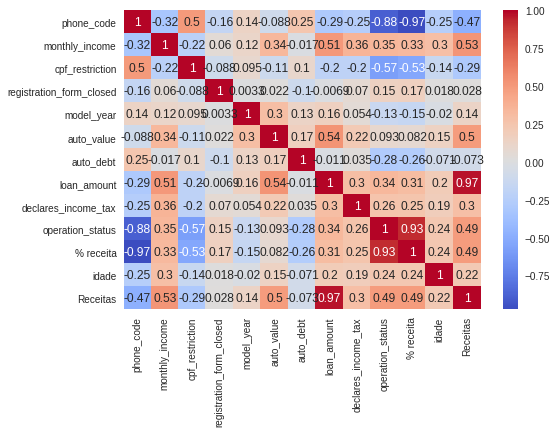

In [69]:
sns.heatmap(treino.corr(),cmap='coolwarm', annot=True)
plt.rcParams['figure.figsize'] = (10.5, 8.5)

Com base na nossa matriz de correlação, exceto as variáveis Receitas, % Receita e Phone Code, que não tem causalidade sobre o operetion_status, podemos concluir que:

* CPF_restriction tem uma correlação média e negativa, o que faz sentido teoricamente. Já que pra ser aprovado, o cliente não pode ter nenhuma restrição. 

* Monthly_income: tem uma correlação média e positiva. 

* Loan_amount: Tem uma correlação média e positiva. 

* Auto_debt: tem uma correlação fraca e negativa em relação ao status da operação. 

Essas serão as variáveis que serão utilizados para a construção do modelo. 

In [70]:
teste.head()

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas
0,2013-09-28,male,85,4000.0,CE,0.0,0,wokvagem,1995.0,7000.0,0.0,5000.0,1,ongoing,0.04,49.0,200.0
1,2013-03-22,NaN,85,2700.0,CE,0.0,0,fiat,2008.0,26000.0,0.0,1000.0,1,ongoing,0.04,44.0,40.0
2,2013-01-01,NaN,85,1200.0,CE,0.0,0,FORD,1991.0,6000.0,0.0,1000.0,0,ongoing,0.04,41.0,40.0
3,2013-09-28,male,85,909.0,CE,0.0,0,dafra,2009.0,0.0,0.0,1000.0,0,ongoing,0.04,41.0,40.0
4,2013-09-30,male,85,978.0,CE,0.0,0,dafra,2009.0,0.0,0.0,1000.0,0,ongoing,0.04,41.0,40.0


In [71]:
train = treino[['monthly_income', 'cpf_restriction', 'loan_amount', 'operation_status']]
train

,monthly_income,cpf_restriction,loan_amount,operation_status
759,2029.0,0,8000.00,1
791,18000.0,0,9000.00,1
805,10000.0,0,10000.00,1
829,4300.0,0,10000.00,1
858,1600.0,0,11250.00,1
...,...,...,...,...
1102,4600.0,0,21600.00,0
1103,1800.0,0,21755.98,0
1104,3200.0,0,21884.50,0
1105,8000.0,0,21951.00,0


In [72]:
train.operation_status.value_counts()

0    650
1    639
Name: operation_status, dtype: int64

Temos uma amostra de dados muito desbalanceada, isso está prejudicando no aprendizado do modelo. Apesar da acurácia estar bem elevada, isso nem sempre é bom, pois o modelo está aprendendo a classificar apenas as pessoas que tiveram os seus empréstimos negados. Dessa forma conseguimos balancear os dados. 

In [74]:
exp_clf = setup(train, target = 'operation_status', session_id=13)

,Description,Value
0,session_id,13
1,Target,operation_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1289, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [76]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7872,0.8820,0.7880,0.7952,0.7858,0.5751,0.5825,1.2340
gbc,Gradient Boosting Classifier,0.7871,0.8740,0.7877,0.7924,0.7863,0.5747,0.5797,0.0810
lightgbm,Light Gradient Boosting Machine,0.7783,0.8621,0.7787,0.7811,0.7779,0.5568,0.5594,0.0470
rf,Random Forest Classifier,0.7761,0.8554,0.7763,0.7782,0.7757,0.5523,0.5543,0.2530
xgboost,Extreme Gradient Boosting,0.7738,0.8591,0.7741,0.7761,0.7735,0.5479,0.5500,0.3450
ada,Ada Boost Classifier,0.7716,0.8685,0.7722,0.7782,0.7707,0.5436,0.5498,0.0850
et,Extra Trees Classifier,0.7649,0.8299,0.7648,0.7662,0.7647,0.5297,0.5310,0.2190
ridge,Ridge Classifier,0.7638,0.0000,0.7664,0.8290,0.7508,0.5303,0.5897,0.0170
lda,Linear Discriminant Analysis,0.7627,0.8818,0.7653,0.8284,0.7495,0.5282,0.5880,0.0180
qda,Quadratic Discriminant Analysis,0.7549,0.8665,0.7577,0.8298,0.7396,0.5128,0.5807,0.0200


In [80]:
cat = create_model('catboost', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8022,0.8986,0.8024,0.8029,0.8022,0.6045,0.6051
1,0.7582,0.8580,0.7592,0.7669,0.7566,0.5174,0.5255
2,0.7778,0.8835,0.7778,0.7783,0.7777,0.5556,0.5561
3,0.7778,0.8615,0.7778,0.7783,0.7777,0.5556,0.5561
4,0.8333,0.9035,0.8333,0.8335,0.8333,0.6667,0.6668
5,0.7778,0.8946,0.7778,0.7922,0.7750,0.5556,0.5698
6,0.7667,0.8782,0.7678,0.7706,0.7662,0.5343,0.5376
7,0.8444,0.9125,0.8454,0.8475,0.8443,0.6893,0.6921
8,0.7778,0.8577,0.7796,0.7877,0.7765,0.5571,0.5660
9,0.7556,0.8723,0.7594,0.7941,0.7486,0.5147,0.5501


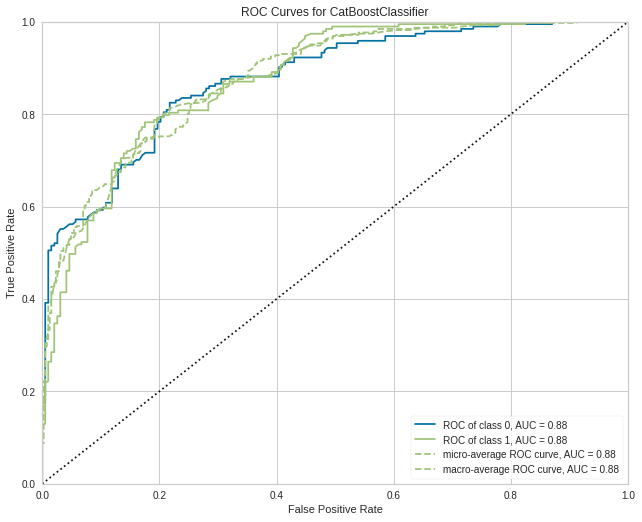

In [81]:
plot_model(cat)

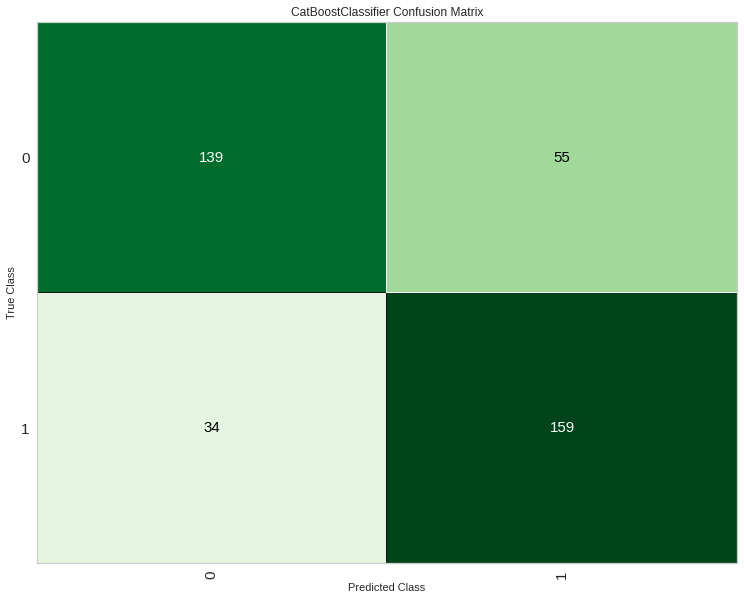

In [82]:
plot_model(cat, plot='confusion_matrix')


Nossa matriz de confusão, apresenta num total de 387 predições, cerca de 75,71% de acerto. É um bom modelo, visto que esse modelo está bem balanceado. Essa acertando tanto os empréstimos liberados, quanto os empréstimos recusados. 

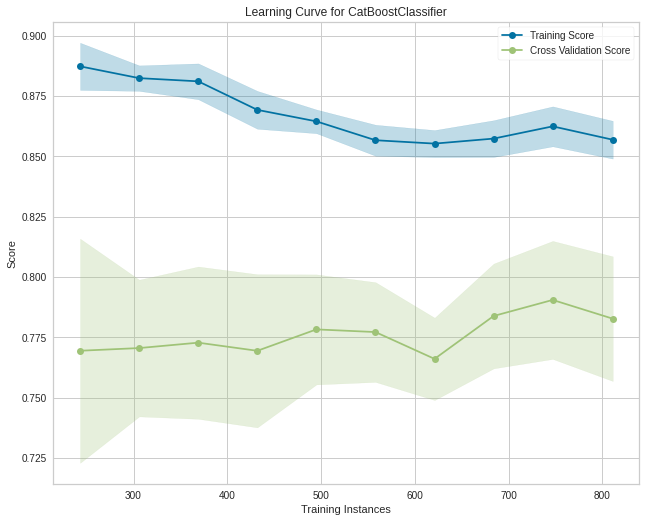

In [83]:
plot_model(cat, plot='learning')

Nos testes de validação cruzada, nosso modelo teve uma queda em relação ao modelo que foi treinado. Porém a validação cruzada dá mais robustes aos nossos resultados, visto que na validação cruzada, o dataframe é dividido e testado igualmente por todas as partes, eliminando qualquer chance do modelo ter um overfitting ou underfitting. 

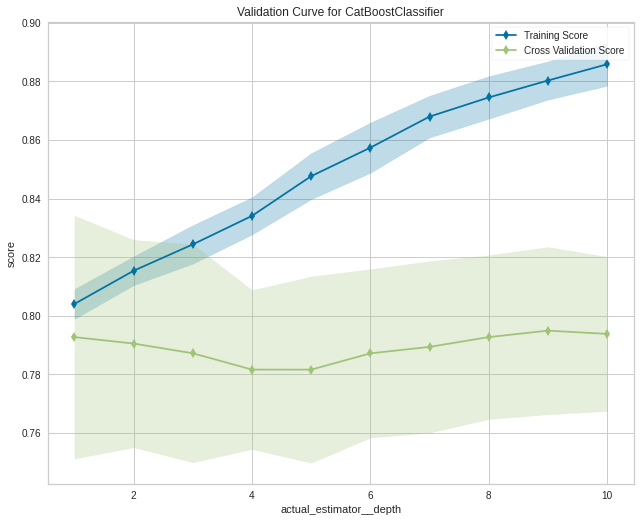

In [84]:
plot_model(cat, plot='vc')

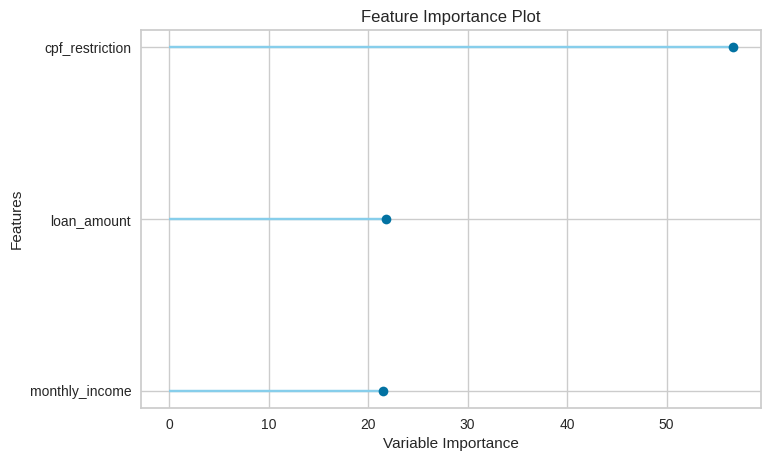

In [85]:
plot_model(cat, plot='feature')

Com base nesse modelo com apenas 3 features, CPF Restriction obteve cerca de 58% de importância dessa feature para a construção do modelo. Renda mensal, obteve cerca de 29% e o restante dos 16%, referente ao valor do empréstimo. 



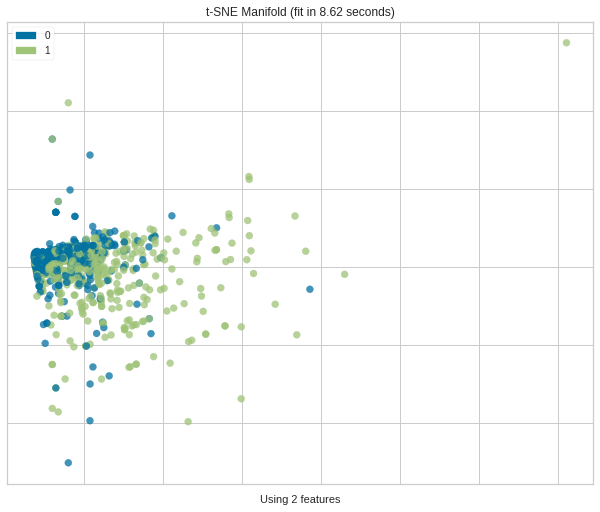

In [86]:
plot_model(cat, plot='manifold')

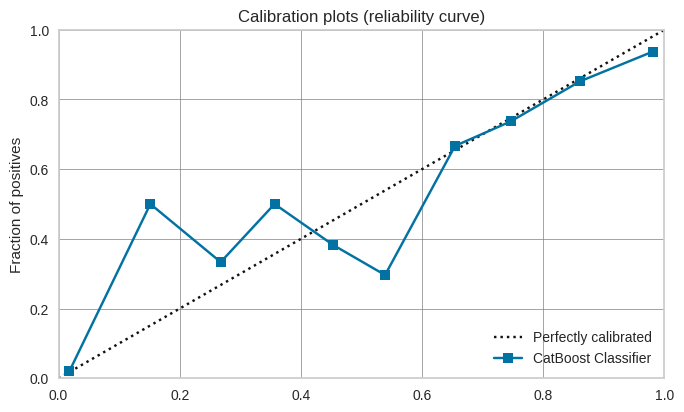

In [87]:
plot_model(cat, plot='calibration')

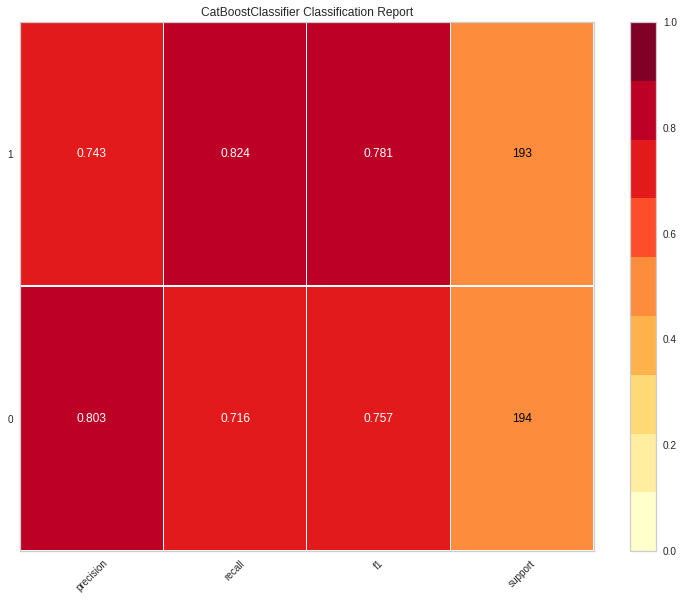

In [88]:
plot_model(cat, plot='class_report')

No gráfico <b> class report </b>, é aonde conseguimos verificar as métricas do modelo. Todos os valores estão bem próximos um do outro, isso reforça que o modelo aprendeu bem com as duas variáveis. 

Caso tivemos muita diferença principalmente na variável PRECISION, isso reforçaria que o modelo aprendeu bem apenas uma das variáveis. A forma de corrigir isso, seria balancear novamente os dados e gerar novamente o modelo, até que os resultados ficassem com uma diferença menor. 

In [ ]:
evaluate_model(lr)

In [89]:
cat_pred_holdout = predict_model(cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7700,0.8766,0.7702,0.7733,0.7694,0.5402,0.5434


In [90]:
cat_pred_new = predict_model(cat, data = teste) #new_data is pd dataframe

Aplicando o conjunto de dados <b> TESTE </b> para validar o modelo final. 

In [91]:
cat_pred_new['Label'].value_counts()

1.0    2614
0.0    2353
Name: Label, dtype: int64

Um excelente resultado nos dados de Teste, que utilizamos para fazer a validação do modelo. Dos dados ongoing(em análise), cerca de 52,62% dos dados foram classificados como cliente negado, e cerca de 47,37% dos dados foi classificado como cliente aprovado. 

In [92]:
cat_pred_holdout

,monthly_income,cpf_restriction,loan_amount,operation_status,Label,Score
0,1800.0,1,12310.030273,0,0,0.9905
1,5000.0,0,33300.000000,1,1,0.9595
2,1600.0,0,10942.000000,0,0,0.5639
3,1000.0,1,6838.910156,0,0,0.9955
4,3000.0,0,27000.000000,1,1,0.6922
...,...,...,...,...,...,...
382,4800.0,0,13500.000000,0,1,0.7079
383,2500.0,0,5000.000000,0,0,0.6452
384,6000.0,0,20700.000000,1,1,0.8872
385,4000.0,0,13000.000000,1,1,0.7542


In [93]:
cat_pred_new['Score'].mean()


0.7261783168914826

In [94]:
cat_pred_new['Score'].median()

0.6833

In [95]:
cat_pred_new['Score'].mode()

0    0.6471
dtype: float64

In [96]:
save_model(cat, 'cat_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='operation_status',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='operation_status')),
                 ('fix_perfect', Remove_100(target='operation_status')),
                 ('clean_names', Clean_Colum_Name

In [97]:
train1 = treino[['monthly_income', 'cpf_restriction', 'loan_amount','auto_debt','declares_income_tax','idade', 'operation_status']]
train1

,monthly_income,cpf_restriction,loan_amount,auto_debt,declares_income_tax,idade,operation_status
759,2029.0,0,8000.00,0.0,1,36.0,1
791,18000.0,0,9000.00,0.0,1,50.0,1
805,10000.0,0,10000.00,0.0,1,61.0,1
829,4300.0,0,10000.00,0.0,1,33.0,1
858,1600.0,0,11250.00,0.0,0,29.0,1
...,...,...,...,...,...,...,...
1102,4600.0,0,21600.00,23000.0,1,51.0,0
1103,1800.0,0,21755.98,28000.0,0,36.0,0
1104,3200.0,0,21884.50,0.0,1,28.0,0
1105,8000.0,0,21951.00,0.0,1,35.0,0


In [98]:
exp_clf = setup(train1, target = 'operation_status', session_id=13)

,Description,Value
0,session_id,13
1,Target,operation_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1289, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [99]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8425,0.9258,0.8431,0.8466,0.8422,0.6853,0.6892,0.0900
catboost,CatBoost Classifier,0.8392,0.9207,0.8398,0.8445,0.8387,0.6788,0.6838,1.3930
rf,Random Forest Classifier,0.8370,0.9093,0.8373,0.8391,0.8368,0.6742,0.6761,0.2500
et,Extra Trees Classifier,0.8370,0.9048,0.8375,0.8410,0.8366,0.6743,0.6781,0.2200
ada,Ada Boost Classifier,0.8336,0.9066,0.8343,0.8389,0.8331,0.6677,0.6726,0.0930
xgboost,Extreme Gradient Boosting,0.8281,0.9037,0.8284,0.8305,0.8278,0.6564,0.6587,0.3390
lightgbm,Light Gradient Boosting Machine,0.8259,0.9065,0.8263,0.8282,0.8256,0.6520,0.6542,0.0540
ridge,Ridge Classifier,0.8226,0.0000,0.8243,0.8484,0.8192,0.6465,0.6710,0.0180
lda,Linear Discriminant Analysis,0.8226,0.9147,0.8243,0.8484,0.8192,0.6465,0.6710,0.0190
qda,Quadratic Discriminant Analysis,0.8193,0.9103,0.8205,0.8332,0.8172,0.6396,0.6527,0.0190


In [102]:
gbc2 = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8791,0.9502,0.8797,0.8839,0.8788,0.7585,0.7631
1,0.8571,0.9290,0.8577,0.8617,0.8568,0.7146,0.7189
2,0.8556,0.9560,0.8556,0.8644,0.8547,0.7111,0.7199
3,0.7889,0.8988,0.7889,0.7890,0.7889,0.5778,0.5779
4,0.8667,0.9558,0.8667,0.8667,0.8667,0.7333,0.7333
5,0.8333,0.9072,0.8333,0.8335,0.8333,0.6667,0.6668
6,0.8333,0.9214,0.8335,0.8336,0.8334,0.6667,0.6668
7,0.8556,0.9402,0.8562,0.8574,0.8555,0.7114,0.7130
8,0.8111,0.8913,0.8127,0.8194,0.8103,0.6233,0.6310
9,0.8444,0.9076,0.8463,0.8562,0.8435,0.6900,0.7011


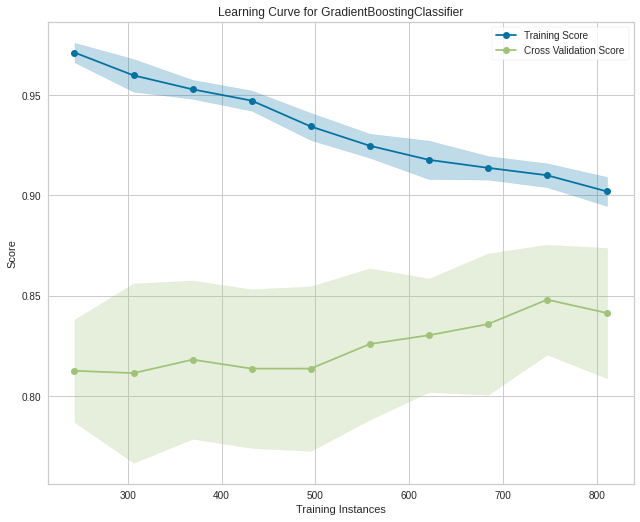

In [103]:
plot_model(gbc2, plot='learning')

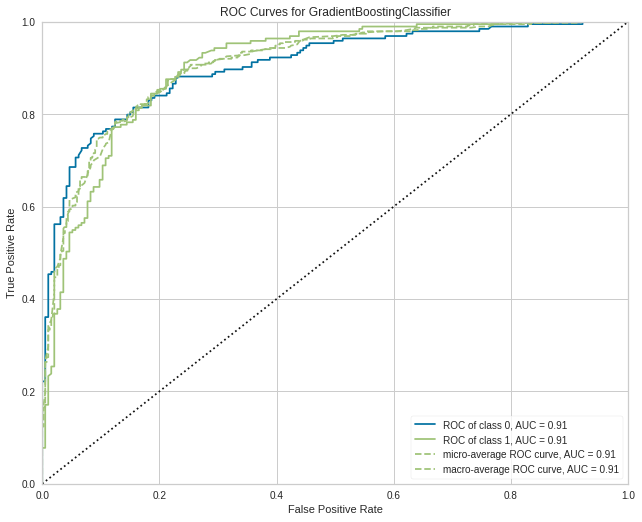

In [104]:
plot_model(gbc2)

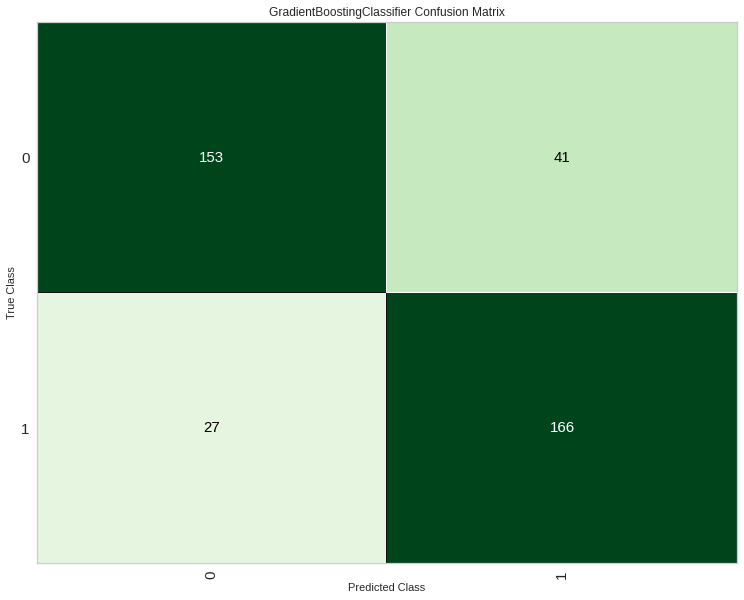

In [105]:
plot_model(gbc2, plot='confusion_matrix')

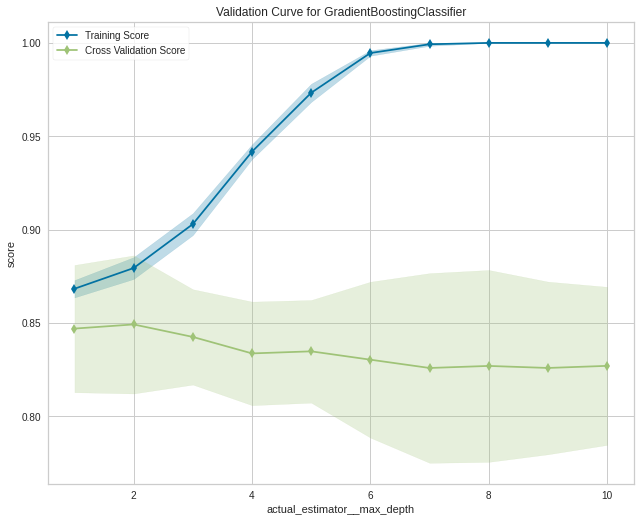

In [106]:
plot_model(gbc2, plot='vc')

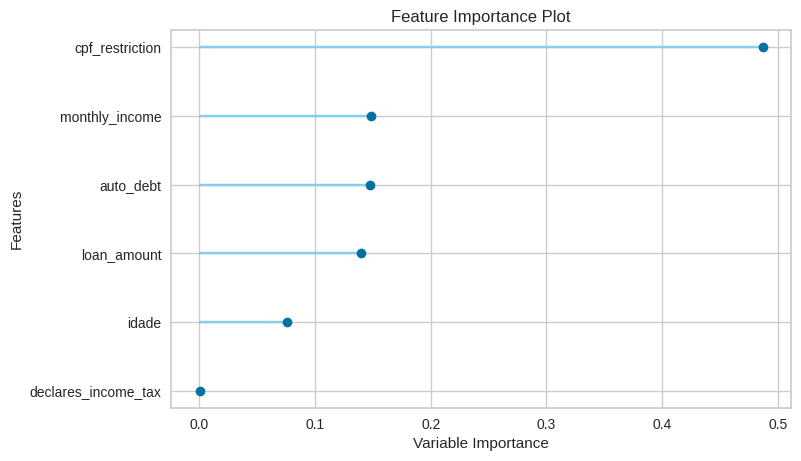

In [107]:
plot_model(gbc2, plot='feature')

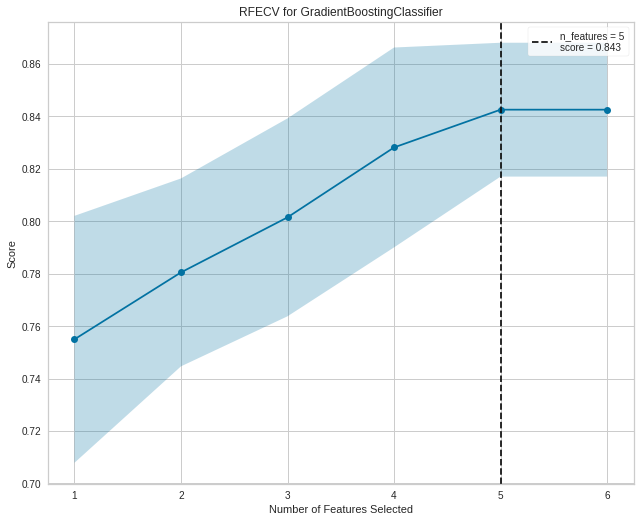

In [108]:
plot_model(gbc2, plot='rfe')

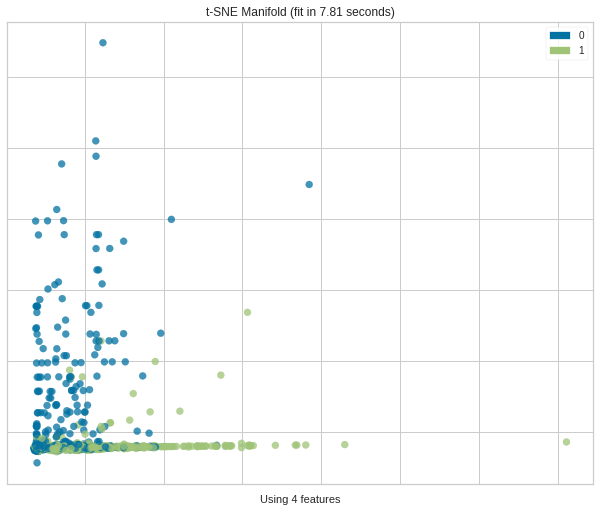

In [109]:
plot_model(gbc2, plot='manifold')

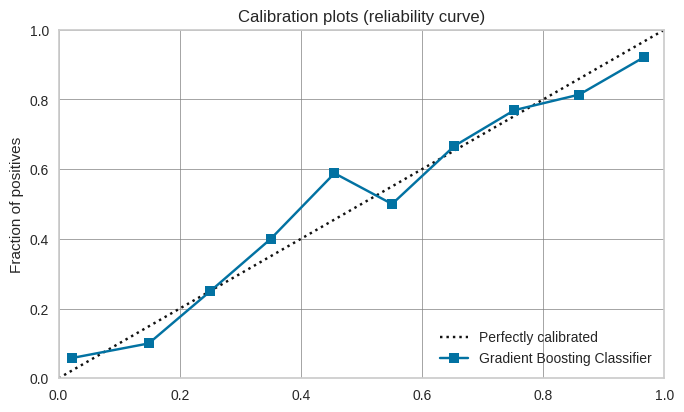

In [110]:
plot_model(gbc2, plot='calibration')

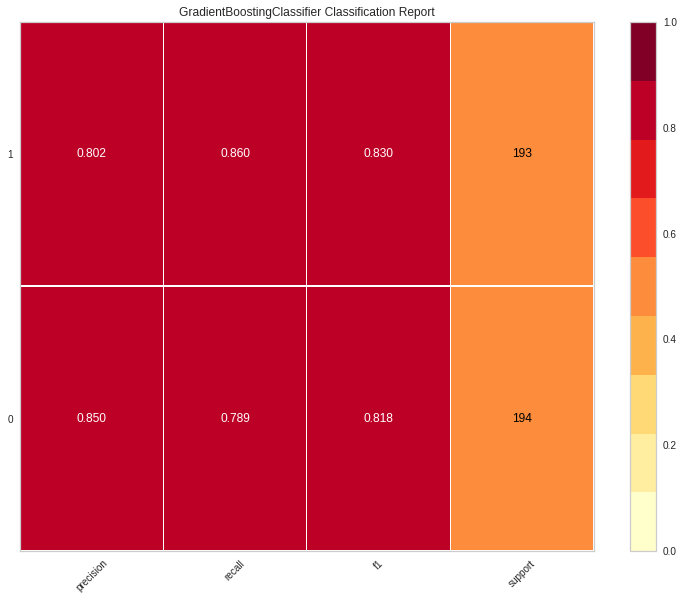

In [111]:
plot_model(gbc2, plot='class_report')

In [112]:
interpret_model(gbc2)

ImportError: shap library not found. pip install shap to use interpret_model function.

In [113]:
gbc2_pred_holdout = predict_model(gbc2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8243,0.9055,0.8244,0.8260,0.8241,0.6486,0.6503


In [114]:
gbc2_pred_new = predict_model(gbc2, data = teste) #new_data is pd dataframe

In [115]:
gbc2_pred_new['Label'].value_counts()

1.0    2672
0.0    2295
Name: Label, dtype: int64

In [116]:
gbc2_pred_new

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas,Label,Score
0,2013-09-28,male,85.0,4000.0,CE,0.0,0.0,wokvagem,1995.0,7000.0,0.0,5000.0,1.0,ongoing,0.04,49.0,200.0,1.0,0.7356
1,2013-03-22,NaN,85.0,2700.0,CE,0.0,0.0,fiat,2008.0,26000.0,0.0,1000.0,1.0,ongoing,0.04,44.0,40.0,0.0,0.5255
2,2013-01-01,NaN,85.0,1200.0,CE,0.0,0.0,FORD,1991.0,6000.0,0.0,1000.0,0.0,ongoing,0.04,41.0,40.0,0.0,0.6238
3,2013-09-28,male,85.0,909.0,CE,0.0,0.0,dafra,2009.0,0.0,0.0,1000.0,0.0,ongoing,0.04,41.0,40.0,0.0,0.9251
4,2013-09-30,male,85.0,978.0,CE,0.0,0.0,dafra,2009.0,0.0,0.0,1000.0,0.0,ongoing,0.04,41.0,40.0,0.0,0.9251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57135,2016-03-17,female,95.0,7500.0,RR,0.0,0.0,GM - Chevrolet,2010.0,21000.0,0.0,6000.0,1.0,ongoing,0.04,41.0,240.0,1.0,NaN
57138,2016-01-14,male,95.0,4950.0,RR,1.0,0.0,Ford,2008.0,8000.0,10000.0,7200.0,1.0,ongoing,0.04,61.0,288.0,0.0,NaN
57164,2016-03-11,female,95.0,3500.0,RR,0.0,0.0,VW - VolksWagen,2011.0,20000.0,0.0,18000.0,1.0,ongoing,0.04,51.0,720.0,1.0,NaN
57180,2016-03-01,male,95.0,1390.0,RR,0.0,0.0,Fiat,2007.0,10000.0,1200.0,5000.0,0.0,ongoing,0.04,30.0,200.0,0.0,NaN


In [117]:
save_model(gbc2, 'gbc2_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='operation_status',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
           

##### Resposta questão 3

Com base nesse modelo com apenas 3 features, CPF Restriction obteve cerca de 47% de importância dessa feature para a construção do modelo. Renda mensal, obteve cerca de 37% e o restante dos 16%, referente ao debitos do automóvel.

Essas variáveis tem uma correlação de Person de 0.35, o que é uma correlação media e positiva. Já o modelo, deu um peso de 37% na "composição" das features mais importantes. 


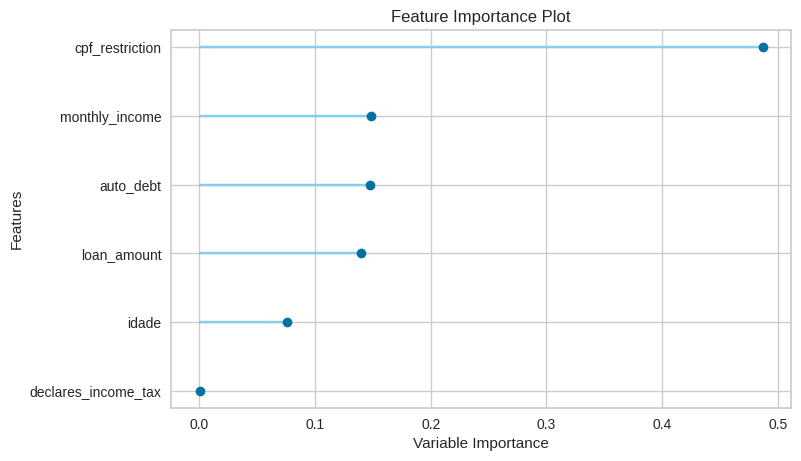

In [119]:
plot_model(gbc2, plot='feature')

<b> Resposta Questão 4 </b>

Segundo a matriz de correlação, as variáveis com as maiores correlações são: CPF_restriction, Monthly_income e loan_amount. Declares Income Tax é uma variável que não teve importância para o modelo Gradient Boosting Classifier, mesmo tendo umas das maiores correlações. 
Essas variáveis foram escolhidas com base na correlação de person. Uma vez que obtivemos correlações médias e fracas. Variáveis altamente correlacionadas pode provocar multicolinearidade nos dados, isto é, uma variável pode usurpar o podem de explicação de outra variável. Por isso foram escolhidos essas variáveis. 

Lembrando que esse teste deveria ter sido feito inteiramente no excel. No excel o único modelo possível seria gerar uma regressão linear, e aplicar uma sigmoide dentro da regressão, o que resultaria num modelo logistico. Dessa forma conseguiria chegar a probabilidade. 

Para se chegar ao melhor modelo teria que fazer varias regressões, e no final, calcular a que obteve o melhor desempenho. 

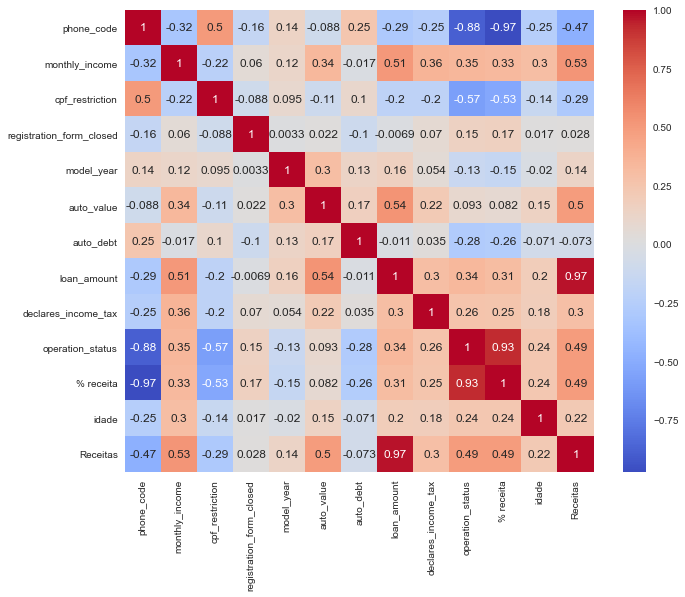

In [159]:
sns.heatmap(treino.corr(),cmap='coolwarm', annot=True)
plt.rcParams['figure.figsize'] = (10.5, 8.5)

<b>Q5</b> - Existem diversos perfis de cliente na base. Certos perfis são mais propensos a fechar negócio do que outros. Usando as três variáveis da questão 4, calcule a probabilidade que os diferentes clientes têm de fechar as respectivas operações. Por fim, calcule o valor que cada cliente tem para nós, baseado nesta probabilidade.


<b>RESPOSTA:</b> Essa questão não ficou bem clara, principalmente no trecho final. A probabilidade já encontramos nos dados ongoing. Agora bastaria rodarmos o arquivo treino nas predições, e teriamos uma classificação da variável label mais o score (que é a probabilidade). Bastaria juntar os arquivos para calcular a probabilidade total. Nesse caso, iriamos multiplicar a probabilidade pelas <b>Receitas</b> ou pelo <b>valor do empréstimo (loan_amount)?</b>

Acredito que seja pela variável Receitas. Então vamos submeter os dados de Treino, na predição e juntar com os dados de validação. Com base na probalidade média, vamos multiplicar pelas receitas. Essa será a probabilidade média das receitas para a empresa. 

In [120]:
rf_pred_new1 = predict_model(gbc2, data = df) #new_data is pd dataframe

In [121]:
rf_pred_new1

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas,Label,Score
0,2013-09-28,male,85,4000.0,CE,0.0,0,wokvagem,1995.0,7000.0,0.0,5000.00,1,ongoing,0.04,49.0,200.0000,1,0.7356
1,2013-03-22,NaN,85,2700.0,CE,0.0,0,fiat,2008.0,26000.0,0.0,1000.00,1,ongoing,0.04,44.0,40.0000,0,0.5255
2,2013-01-01,NaN,85,1200.0,CE,0.0,0,FORD,1991.0,6000.0,0.0,1000.00,0,ongoing,0.04,41.0,40.0000,0,0.6238
3,2013-09-28,male,85,909.0,CE,0.0,0,dafra,2009.0,0.0,0.0,1000.00,0,ongoing,0.04,41.0,40.0000,0,0.9251
4,2013-09-30,male,85,978.0,CE,0.0,0,dafra,2009.0,0.0,0.0,1000.00,0,ongoing,0.04,41.0,40.0000,0,0.9251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57177,2013-03-22,NaN,95,3700.0,RR,0.0,0,FIAT,2012.0,0.0,0.0,28000.00,1,no_closed,0.04,38.0,1120.0000,1,0.9581
57178,2015-12-28,female,95,5000.0,RR,1.0,0,VW - VolksWagen,2014.0,43000.0,0.0,34194.53,1,no_closed,0.04,35.0,1367.7812,0,0.9884
57179,2015-07-23,male,95,18000.0,RR,0.0,0,VW - VolksWagen,2010.0,51000.0,0.0,45900.00,1,no_closed,0.04,49.0,1836.0000,1,0.9835
57180,2016-03-01,male,95,1390.0,RR,0.0,0,Fiat,2007.0,10000.0,1200.0,5000.00,0,ongoing,0.04,30.0,200.0000,0,0.7420


In [122]:
rf_pred_new1['Valor_cliente'] = rf_pred_new1['Receitas'] * rf_pred_new1['Score']
rf_pred_new1

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas,Label,Score,Valor_cliente
0,2013-09-28,male,85,4000.0,CE,0.0,0,wokvagem,1995.0,7000.0,0.0,5000.00,1,ongoing,0.04,49.0,200.0000,1,0.7356,147.120000
1,2013-03-22,NaN,85,2700.0,CE,0.0,0,fiat,2008.0,26000.0,0.0,1000.00,1,ongoing,0.04,44.0,40.0000,0,0.5255,21.020000
2,2013-01-01,NaN,85,1200.0,CE,0.0,0,FORD,1991.0,6000.0,0.0,1000.00,0,ongoing,0.04,41.0,40.0000,0,0.6238,24.952000
3,2013-09-28,male,85,909.0,CE,0.0,0,dafra,2009.0,0.0,0.0,1000.00,0,ongoing,0.04,41.0,40.0000,0,0.9251,37.004000
4,2013-09-30,male,85,978.0,CE,0.0,0,dafra,2009.0,0.0,0.0,1000.00,0,ongoing,0.04,41.0,40.0000,0,0.9251,37.004000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57177,2013-03-22,NaN,95,3700.0,RR,0.0,0,FIAT,2012.0,0.0,0.0,28000.00,1,no_closed,0.04,38.0,1120.0000,1,0.9581,1073.072000
57178,2015-12-28,female,95,5000.0,RR,1.0,0,VW - VolksWagen,2014.0,43000.0,0.0,34194.53,1,no_closed,0.04,35.0,1367.7812,0,0.9884,1351.914938
57179,2015-07-23,male,95,18000.0,RR,0.0,0,VW - VolksWagen,2010.0,51000.0,0.0,45900.00,1,no_closed,0.04,49.0,1836.0000,1,0.9835,1805.706000
57180,2016-03-01,male,95,1390.0,RR,0.0,0,Fiat,2007.0,10000.0,1200.0,5000.00,0,ongoing,0.04,30.0,200.0000,0,0.7420,148.400000


In [124]:
rf_pred_new1['Valor_cliente'].sum()

40361628.957601376

In [128]:
predição = rf_pred_new1.loc[(rf_pred_new1['operation_status']=='ongoing')]
predição

,created_at,gender,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,% receita,idade,Receitas,Label,Score,Valor_cliente
0,2013-09-28,male,85,4000.0,CE,0.0,0,wokvagem,1995.0,7000.0,0.0,5000.0,1,ongoing,0.04,49.0,200.0,1,0.7356,147.1200
1,2013-03-22,NaN,85,2700.0,CE,0.0,0,fiat,2008.0,26000.0,0.0,1000.0,1,ongoing,0.04,44.0,40.0,0,0.5255,21.0200
2,2013-01-01,NaN,85,1200.0,CE,0.0,0,FORD,1991.0,6000.0,0.0,1000.0,0,ongoing,0.04,41.0,40.0,0,0.6238,24.9520
3,2013-09-28,male,85,909.0,CE,0.0,0,dafra,2009.0,0.0,0.0,1000.0,0,ongoing,0.04,41.0,40.0,0,0.9251,37.0040
4,2013-09-30,male,85,978.0,CE,0.0,0,dafra,2009.0,0.0,0.0,1000.0,0,ongoing,0.04,41.0,40.0,0,0.9251,37.0040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57135,2016-03-17,female,95,7500.0,RR,0.0,0,GM - Chevrolet,2010.0,21000.0,0.0,6000.0,1,ongoing,0.04,41.0,240.0,1,0.7709,185.0160
57138,2016-01-14,male,95,4950.0,RR,1.0,0,Ford,2008.0,8000.0,10000.0,7200.0,1,ongoing,0.04,61.0,288.0,0,0.9724,280.0512
57164,2016-03-11,female,95,3500.0,RR,0.0,0,VW - VolksWagen,2011.0,20000.0,0.0,18000.0,1,ongoing,0.04,51.0,720.0,1,0.7392,532.2240
57180,2016-03-01,male,95,1390.0,RR,0.0,0,Fiat,2007.0,10000.0,1200.0,5000.0,0,ongoing,0.04,30.0,200.0,0,0.7420,148.4000


In [129]:
predição['Valor_cliente'].sum()

3119087.50976933

A receita total estimada é de R$3.119.087,51 reais. 

In [ ]:
final_gbc = finalize_model(gbc)

In [124]:
save_model(gbc1, 'et_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=13, verbose=0,
                     warm_start=False), model_name=et_model, verbose=True)
INFO:logs:Appending prep pipeline
INFO:logs:et_model.pkl saved in current working directory
INFO:logs:[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
             

Transformation Pipeline and Model Succesfully Saved
